In [2]:
import pickle as pickle
from pprint import pprint
from tqdm import tqdm
import pandas as pd
import numpy as np
import re
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_colwidth', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Having only PMC articles

In [4]:
# Load Model
with open("./topic modeling for PMC/data/saved_results/model/lda_k=5_full.pickle", "rb") as fp:
    lda_5 = pickle.load(fp)
    
# datawords
with open("./topic modeling for PMC/data/saved_results/data_words/q=0.005_full.pickle", "rb") as fp:
    data_word = pickle.load(fp)

# load corpus
with open("./topic modeling for PMC/data/saved_results/corpus/q=0.005_full_corpus.pickle", "rb") as fp:
    corpus = pickle.load(fp)
    
# load doc_lda
with open("./topic modeling for PMC/data/saved_results/corpus/lda_k=5_full_doc_lda.pickle", "rb") as fp:
    doc_lda = pickle.load(fp)

In [6]:
def topics_df(model, bar=0.005, num_words=40):
    """
    Use this method to display topics in one DataFrame

    @param
    model: input model 
    bar: threshold of word frequency 
    num_words: number of words for each topic
    """
    topics = {}
    for idx, item in model.print_topics(num_words=num_words):
        idx += 1
        topic = []
        for num, j in zip(re.findall(r'\s(0.0[0-9]{2})\*', item),re.findall('\"([a-zA-Z]+)\"', item)):
            
            # set the threshold
            if float(num) >= bar:
                topic.append(j)
        topics[f'Topic{idx}'] = ', '.join(topic)

    # create the dataframe 
    df = pd.DataFrame(topics.values(), columns=['Terms per Topic'], index=topics.keys())
    return df

In [6]:
# coherence model
with open("./topic modeling for PMC/data/saved_results/model/lda_k=5_full_coherence.pickle", "rb") as fp:
    coh_model = pickle.load(fp)

In [7]:
coh_model.get_coherence()

0.4568900222091892

In [8]:
coh_model.get_coherence_per_topic()

[0.4232997279657872,
 0.4967858730663689,
 0.5115504922939627,
 0.36253981944292046,
 0.4902741982769069]

In [9]:
topics_df(lda_5)

,Terms per Topic
Topic1,"frame, synbio, model, public, interaction, event, debate, environment, challenge, context, analysis, nature, engagement, complex, innovation, social, question, community, solution, societal, risk, mutualism, stakeholder, organism, medium"
Topic2,"cell, gene, production, genome, expression, dna, tool, bacterial, vector, bacteria, protein, hemoglobin, human, host, antibiotic, application, clone, specific, recombination, large, locus, seamless, method, target, molecule, strain, sb, circuit, sequence, resistance, cassette, integration, insertion"
Topic3,"study, dual, science, risk, issue, policy, security, potential, threat, biosecurity, biotechnology, review, biological, state, life, concept, experiment, crime, human, health"
Topic4,"design, safety, practice, infrastructure, risk, material, responsibility, plate, researcher, indeterminacy, user, actor, center, designing, case, point, uncertainty, scenario, possibility, strategy, knowledge, important"
Topic5,"project, genome, dna, gene, yeast, genetic, chromosome, strain, sequence, natural, laboratory, cell, synthesis, work, benefit, organism, cerevisiae, time, guideline, dot, field, world, growth"


In [10]:
lda_5.print_topics()

[(0,
  '0.011*"frame" + 0.011*"model" + 0.011*"synbio" + 0.010*"public" + 0.009*"interaction" + 0.008*"event" + 0.007*"debate" + 0.007*"challenge" + 0.007*"environment" + 0.006*"context"'),
 (1,
  '0.021*"cell" + 0.017*"gene" + 0.011*"production" + 0.011*"genome" + 0.011*"expression" + 0.010*"dna" + 0.010*"tool" + 0.009*"bacterial" + 0.009*"vector" + 0.008*"bacteria"'),
 (2,
  '0.012*"study" + 0.011*"dual" + 0.011*"science" + 0.010*"risk" + 0.010*"issue" + 0.010*"security" + 0.010*"policy" + 0.009*"potential" + 0.009*"threat" + 0.008*"biosecurity"'),
 (3,
  '0.029*"design" + 0.022*"safety" + 0.019*"practice" + 0.013*"infrastructure" + 0.013*"risk" + 0.010*"material" + 0.009*"responsibility" + 0.008*"plate" + 0.008*"researcher" + 0.007*"indeterminacy"'),
 (4,
  '0.017*"project" + 0.016*"genome" + 0.014*"sc2" + 0.013*"dna" + 0.011*"gene" + 0.011*"yeast" + 0.010*"genetic" + 0.009*"chromosome" + 0.009*"strain" + 0.008*"sequence"')]

## Having PMC full text and Pubmed abstracts

In [11]:
# Load Model
with open("./topic modeling for PMC/data/saved_results/model/lda_k=5.pickle", "rb") as fp:
    lda_5 = pickle.load(fp)
    
# datawords
with open("./topic modeling for PMC/data/saved_results/data_words/q=0.005.pickle", "rb") as fp:
    data_word = pickle.load(fp)

# load corpus
with open("./topic modeling for PMC/data/saved_results/corpus/q=0.005_corpus.pickle", "rb") as fp:
    corpus = pickle.load(fp)
    
# load doc_lda
with open("./topic modeling for PMC/data/saved_results/corpus/lda_k=5_doc_lda.pickle", "rb") as fp:
    doc_lda = pickle.load(fp)

In [12]:
# coherence model
with open("./topic modeling for PMC/data/saved_results/model/lda_k=5_coherence.pickle", "rb") as fp:
    coh_model = pickle.load(fp)

In [13]:
topics_df(lda_5)

,Terms per Topic
Topic1,"safety, responsibility, case, actor, moral, participant, phase, scenario, product, discussion, user, point, possibility, food, designing, uncertainty, indeterminacy, strategy, relevant, important"
Topic2,"practice, project, sb, material, infrastructure, dna, researcher, work, knowledge, important, benefit, order, time, regulation, living, data, laboratory, focus, including, synthesis, chemical, experiment, implication, part, existing, effort, standard, plate, make, ethic"
Topic3,"cell, gene, dna, expression, genome, protein, production, vector, sequence, large, hemoglobin, specific, recombinant, clone, disease, site, strategy, artificial, method, platform, seamless, locus, recombination, metabolic, stem, generate"
Topic4,"question, biosecurity, synbio, dual, security, debate, frame, scientist, threat, societal, biotechnology, state, context, innovation, event, governance, social, concept, ethic, policy, participant, analysis, discussion, aspect"
Topic5,"model, interaction, gene, strain, bacteria, natural, engineered, genome, bacterial, complex, environmental, circuit, environment, antibiotic, structure, network, specie, developed, recent, population, experimental, sb"


In [14]:
coh_model.get_coherence()

0.5032261928241852

In [15]:
coh_model.get_coherence_per_topic()

[0.6005180134355256,
 0.41105175285530365,
 0.46139371289834497,
 0.5631330062917719,
 0.4800344786399804]

In [16]:
# Load Model
with open("./topic modeling for PMC/data/saved_results/model/lda_k=5.pickle", "rb") as fp:
    lda_5 = pickle.load(fp)

# Load Coherence
with open("./topic modeling for PMC/data/saved_results/model/lda_k=5_coherence.pickle", "rb") as fp:
    lda_5_co = pickle.load(fp)

# Load Model
with open("./topic modeling for PMC/data/saved_results/model/lda_k=6.pickle", "rb") as fp:
    lda_6 = pickle.load(fp)

# Load Coherence
with open("./topic modeling for PMC/data/saved_results/model/lda_k=6_coherence.pickle", "rb") as fp:
    lda_6_co = pickle.load(fp)
    
# Load Model
with open("./topic modeling for PMC/data/saved_results/model/lda_k=7.pickle", "rb") as fp:
    lda_7 = pickle.load(fp)

# Load Coherence
with open("./topic modeling for PMC/data/saved_results/model/lda_k=7_coherence.pickle", "rb") as fp:
    lda_7_co = pickle.load(fp)

# Load Model
with open("./topic modeling for PMC/data/saved_results/model/lda_k=8.pickle", "rb") as fp:
    lda_8 = pickle.load(fp)

# Load Coherence
with open("./topic modeling for PMC/data/saved_results/model/lda_k=8_coherence.pickle", "rb") as fp:
    lda_8_co = pickle.load(fp)

# Load Model
with open("./topic modeling for PMC/data/saved_results/model/lda_k=9.pickle", "rb") as fp:
    lda_9 = pickle.load(fp)

# Load Coherence
with open("./topic modeling for PMC/data/saved_results/model/lda_k=9_coherence.pickle", "rb") as fp:
    lda_9_co = pickle.load(fp)

# Load Model
with open("./topic modeling for PMC/data/saved_results/model/lda_k=10.pickle", "rb") as fp:
    lda_10 = pickle.load(fp)

# Load Coherence
with open("./topic modeling for PMC/data/saved_results/model/lda_k=10_coherence.pickle", "rb") as fp:
    lda_10_co = pickle.load(fp)

In [19]:
coherences = []
for i in np.arange(5,11):
    co_model = eval('lda_{}_co'.format(i))
    coherences.append(co_model.get_coherence())

<BarContainer object of 6 artists>

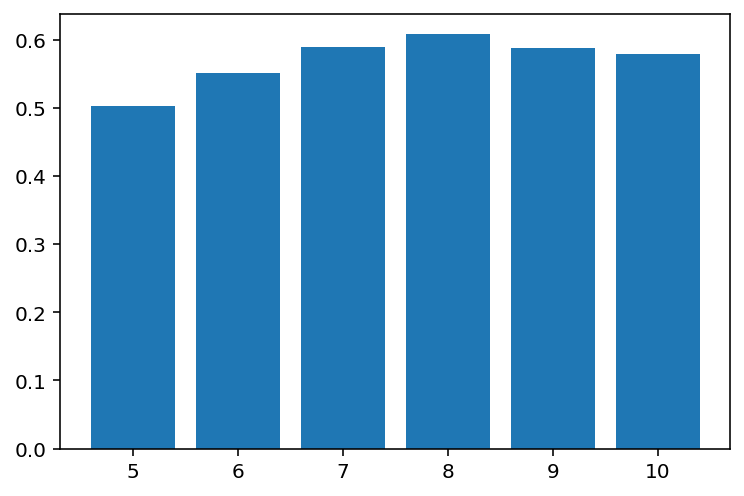

In [20]:
plt.bar(np.arange(5,11),coherences)

In [22]:
topics_df(lda_8, bar = 0.008)

,Terms per Topic
Topic1,"practice, material, infrastructure, researcher, data, work, show, plate, center, team, knowledge"
Topic2,"model, interaction, complex, production, hemoglobin, specie"
Topic3,"safety, responsibility, moral, actor, case, phase, participant, scenario, user, food, designing"
Topic4,"sb, project, scientist, benefit, governance, question, ethic, regulation, participant, living, community, policy"
Topic5,"dual, security, threat, state, concept, biosecurity, year, health, purpose"
Topic6,"gene, genome, dna, bacteria, method, bacterial, engineered, natural, circuit, antibiotic, strain"
Topic7,"cell, expression, gene, vector, dna, genome, large, clone, specific, site, locus, recombination, seamless, generate, stem, protein"
Topic8,"synbio, frame, debate, biotechnology, innovation, event, societal, social, context, analysis, engagement"


In [7]:
def convertldaMalletToldaGen(mallet_model):
    """
    convert mallet_lda model to gensim_lda model 
    """
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [10]:
ldagensim = convertldaMalletToldaGen(lda_5)
vis_data = gensimvis.prepare(ldagensim, corpus, lda_5.id2word, sort_topics=False)
pyLDAvis.display(vis_data)

In [7]:
# Load Model
with open("./topic modeling for PMC/data/saved_results/model/lda_combined_k=7.pickle", "rb") as fp:
    lda_7 = pickle.load(fp)
    
with open("./topic modeling for PMC/data/saved_results/model/lda_combined_k=8.pickle", "rb") as fp:
    lda_8 = pickle.load(fp)
    
with open("./topic modeling for PMC/data/saved_results/model/lda_combined_k=9.pickle", "rb") as fp:
    lda_9 = pickle.load(fp)
    

# load doc_lda
with open("./topic modeling for PMC/data/saved_results/corpus/lda_doc_lda_combined_k=7.pickle", "rb") as fp:
    lda_7_doc = pickle.load(fp)
    
# load doc_lda
with open("./topic modeling for PMC/data/saved_results/corpus/lda_doc_lda_combined_k=8.pickle", "rb") as fp:
    lda_8_doc = pickle.load(fp)
    
    
# load article seq
with open("./topic modeling for PMC/data/saved_results/data_words/article_sq.pickle", "rb") as fp:
    article_sq = pickle.load(fp)

In [8]:
topics_df(lda_7, bar=0.004)

,Terms per Topic
Topic1,"glucose, mg, carbon, flux, titer, fermentation, biosynthesis, fatty, extract"
Topic2,"peptide, domain, light, variant, fusion, membrane, affinity, residue, antibody, surface, ligand, secretion, activation"
Topic3,"circuit, output, input, network, behavior, population, gate, device, switch, noise, simulation, degradation, gfp, repressor, feedback"
Topic4,"membrane, sensor, droplet, electron"
Topic5,"codon, sbol, variant, trna, algorithm, feature, module, class, search"
Topic6,"mrna, terminator, gfp, repression, translation, integration, clone, yeast, rb, variant, cassette, bp, targeting"
Topic7,"cluster, yeast, biosensor, chromosome, biosynthetic, cassette, module, compound, operon, heterologous, metabolite"


In [9]:
topics_df(lda_8, bar=0.005)

,Terms per Topic
Topic1,"gfp, rb, induction, repression, terminator, mrna, variant, biosensor, inducer, strength, upstream, iptg, operator"
Topic2,"yeast, cassette, integration, clone, recombination, chromosome, genomic, deletion, locus, bp, crispr, editing, sgrna, cluster"
Topic3,"sbol, algorithm, module"
Topic4,"translation, trna, membrane, extract, codon, vitro, ribosome, droplet"
Topic5,"variant, residue, peptide, base, domain, codon, compound, specificity, mutagenesis"
Topic6,"glucose, mg, biosynthesis, titer, carbon, fermentation, flux, metabolite"
Topic7,"light, fusion, domain, membrane, peptide, supernatant, antibody"
Topic8,"circuit, output, input, network, behavior, population, gate, simulation, device, noise, degradation, switch"


In [10]:
topics_df(lda_9, bar=0.005)

,Terms per Topic
Topic1,"circuit, output, input, network, behavior, simulation, device, noise, population, gate, degradation"
Topic2,"yeast, cerevisiae, cassette, integration, population, phenotype"
Topic3,"glucose, carbon, flux, fermentation, mg, titer"
Topic4,"sbol, algorithm, feature"
Topic5,"cluster, compound, biosynthetic, biosynthesis, metabolite"
Topic6,"clone, crispr, integration, editing, sgrna, cassette, deletion, bp, targeting, chromosome, recombination, genomic"
Topic7,"variant, domain, residue, light, peptide, codon, trna, base, affinity"
Topic8,"membrane, surface, supernatant, peptide, antibody, image, secretion"
Topic9,"gfp, mrna, translation, induction, rb, repression, terminator, variant, biosensor, inducer, iptg, strength, circuit, operator, regulator"


In [11]:
doc = {}
for n,d in enumerate(article_sq):
    doc[article_sq[n]] = lda_7_doc[n]

doc_dict = {k:[doc[k][i][1] for i in range(7)] for k in doc}
doc_dict

{'sb9b00393': [0.18412698412698408,
  0.04150675195451314,
  0.0738450604122246,
  0.3863657900971334,
  0.13769248993129585,
  0.08860459606728263,
  0.0878583274105662],
 'sb6b00301': [0.017445574721116516,
  0.04386456336920734,
  0.30915524104378594,
  0.04400216226841615,
  0.45012531328320815,
  0.09690893901420215,
  0.03849820630006389],
 'sb7b00200': [0.08678447771932189,
  0.1452043707001214,
  0.08092989792706506,
  0.03100858851567067,
  0.050209092135437755,
  0.5766176536714781,
  0.029245919330905167],
 'sb7b00129': [0.8722426888616001,
  0.02302269522899896,
  0.021239823532087147,
  0.020221039705280396,
  0.017737754127438946,
  0.016464274343930507,
  0.029071724200664034],
 'sb6b00028': [0.02532247871826326,
  0.45738076651425597,
  0.09797405300918179,
  0.08553585368573656,
  0.13861938217910114,
  0.16151815917623877,
  0.03364930671722241],
 'sb8b00011': [0.6238509149364213,
  0.04275799666945817,
  0.1496914917169617,
  0.0476094217755831,
  0.0299556248616285,

In [30]:
doc_dict_acs = {k: doc_dict[k] for k in doc_dict if k.startswith('sb')}

In [31]:
doc_dict_ethics = {k: doc_dict[k] for k in doc_dict if k.startswith('p')}

100%|██████████| 219/219 [00:05<00:00, 37.69it/s]


(array([1.3000e+01, 7.7100e+02, 4.7020e+03, 1.6399e+04, 3.4450e+04,
        5.3590e+04, 5.7576e+04, 2.3229e+04, 5.8200e+03, 2.0830e+03]),
 array([0.00641586, 0.09729512, 0.18817437, 0.27905362, 0.36993287,
        0.46081212, 0.55169137, 0.64257062, 0.73344987, 0.82432913,
        0.91520838]),
 <a list of 10 Patch objects>)

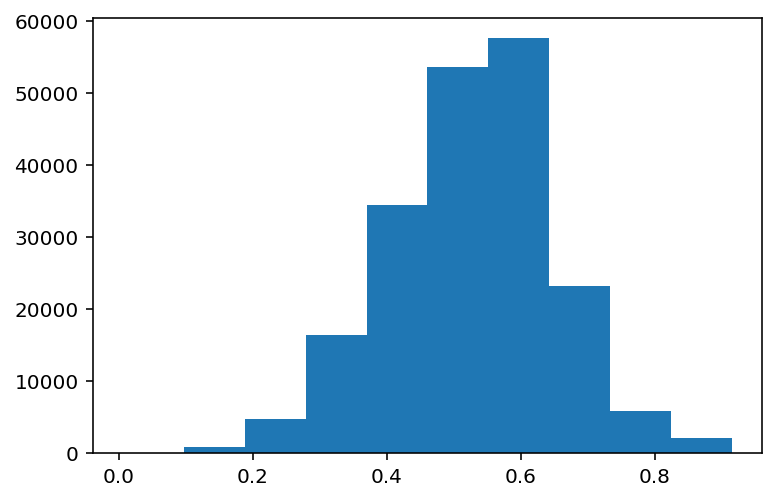

In [40]:
from scipy.spatial.distance import jensenshannon


list_of_js = []
for key in tqdm(doc_dict_ethics):
    node = doc_dict_ethics[key]
    for k in doc_dict_acs:
        value = jensenshannon(node, doc_dict_acs[k],2)
        list_of_js.append(value)
plt.hist(list_of_js)

In [33]:
def find_closest_in_acs(doc_dict_ethics, doc_dict_acs, threshold = np.percentile(list_of_js, q=1)):
    similar_dict = {}
    for key in tqdm(doc_dict_ethics):
        node = doc_dict_ethics[key]
        for k in doc_dict_acs:
            
            if jensenshannon(node, doc_dict_acs[k],2) <= threshold:
                similar_dict[key] = k

    return similar_dict

In [34]:
similar_dict_acs = find_closest_in_acs(doc_dict_ethics, doc_dict_acs, 0.1)

100%|██████████| 219/219 [00:05<00:00, 38.25it/s]


In [35]:
similar_dict_acs

{'pmid33633695': 'sb7b00219',
 'pmid33199860': 'sb7b00219',
 'pmid24006130': 'sb9b00348',
 'pmid33333069': 'sb9b00348',
 'pmid26496614': 'sb9b00348',
 'pmid31088375': 'sb9b00348',
 'pmc6463046': 'sb8b00025',
 'pmid27017007': 'sb7b00219',
 'pmc5851096': 'sb6b00339',
 'pmc5097395': 'sb9b00237',
 'pmid32172182': 'sb9b00348'}

In [36]:
compare_df = pd.DataFrame({'ACS_title':[], 'abstract_2':[], 'keywords_acs':[], 'Pubmed_title':[], 'abstract_1':[]})

In [38]:
import json
for a,b in similar_dict_acs.items():
    with open('./topic modeling for PMC/data/json-files/{}.json'.format(a), 'r') as f:
        pubmed = json.load(f)
        pubmed_title = pubmed['title']
        pub_abst = pubmed['abstract']
        
    with open('../topic modeling/data/json-files/{}.json'.format(b), 'r') as f:
        acs = json.load(f)
        acs_title = acs['article_title']
        acs_keys = acs['keywords']
        acs_absr = ''.join(acs['abstract'])
    compare_df = compare_df.append({'Pubmed_title':pubmed_title, 'keywords_acs':acs_keys, 'abstract_1':pub_abst,'ACS_title':acs_title,'abstract_2':acs_absr}, ignore_index=True)

In [41]:
doc_dict_acs['sb7b00219'], doc_dict_ethics['pmid33633695']

([0.1256531598146505,
  0.09994577541161395,
  0.22097752144335997,
  0.22598097209898454,
  0.10745095139505077,
  0.08407275953859808,
  0.13591886029774228],
 [0.10476190476190476,
  0.09802789802789805,
  0.16132756132756132,
  0.28051948051948056,
  0.12765752765752764,
  0.10745550745550744,
  0.12025012025012023])

In [44]:
jensenshannon(doc_dict_acs['sb7b00219'], doc_dict_ethics['pmid33633695'],2)

0.09049177436002623

In [39]:
compare_df

,ACS_title,abstract_2,keywords_acs,Pubmed_title,abstract_1
0,A Cell-Free Biosensor for Detecting Quorum Sensing Molecules in P. aeruginosa-Infected Respiratory Samples,"Synthetic biology designed cell-free biosensors are a promising new tool for the detection of clinically relevant biomarkers in infectious diseases.Here, we report that a modular DNA-encoded biosensor in cell-free protein expression systems can be used to measure a bacterial biomarker of Pseudomonas aeruginosa infection from human sputum samples.By optimizing the cell-free system and sample extraction, we demonstrate that the quorum sensing molecule 3-oxo-C12-HSL in sputum samples from cystic fibrosis lungs can be quantitatively measured at nanomolar levels using our cell-free biosensor system, and is comparable to LC–MS measurements of the same samples.This study further illustrates the potential of modular cell-free biosensors as rapid, low-cost detection assays that can inform clinical practice.","[Pseudomonas aeruginosa, cystic fibrosis, quorum sensing, cell-free synthetic biology, biosensor]",Translating New Synthetic Biology Advances for Biosensing Into the Earth and Environmental Sciences.,"The rapid diversification of synthetic biology tools holds promise in making some classically hard-to-solve environmental problems tractable. Here we review longstanding problems in the Earth and environmental sciences that could be addressed using engineered microbes as micron-scale sensors (biosensors). Biosensors can offer new perspectives on open questions, including understanding microbial behaviors in heterogeneous matrices like soils, sediments, and wastewater systems, tracking cryptic element cycling in the Earth system, and establishing the dynamics of microbe-microbe, microbe-plant, and microbe-material interactions. Before these new tools can reach their potential, however, a suite of biological parts and microbial chassis appropriate for environmental conditions must be developed by the synthetic biology community. This includes diversifying sensing modules to obtain information relevant to environmental questions, creating output signals that allow dynamic reporting from hard-to-image environmental materials, and tuning these sensors so that they reliably function long enough to be useful for environmental studies. Finally, ethical questions related to the use of synthetic biosensors in environmental applications are discussed."
1,A Cell-Free Biosensor for Detecting Quorum Sensing Molecules in P. aeruginosa-Infected Respiratory Samples,"Synthetic biology designed cell-free biosensors are a promising new tool for the detection of clinically relevant biomarkers in infectious diseases.Here, we report that a modular DNA-encoded biosensor in cell-free protein expression systems can be used to measure a bacterial biomarker of Pseudomonas aeruginosa infection from human sputum samples.By optimizing the cell-free system and sample extraction, we demonstrate that the quorum sensing molecule 3-oxo-C12-HSL in sputum samples from cystic fibrosis lungs can be quantitatively measured at nanomolar levels using our cell-free biosensor system, and is comparable to LC–MS measurements of the same samples.This study further illustrates the potential of modular cell-free biosensors as rapid, low-cost detection assays that can inform clinical practice.","[Pseudomonas aeruginosa, cystic fibrosis, quorum sensing, cell-free synthetic biology, biosensor]",Rethinking organoid technology through bioengineering.,"In recent years considerable progress has been made in the development of faithful procedures for the differentiation of human pluripotent stem cells (hPSCs). An important step in this direction has also been the derivation of organoids. This technology generally relies on traditional three-dimensional culture techniques that exploit cell-autonomous self-organization responses of hPSCs with minimal control over the external inputs supplied to the system. The convergence of s